In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from lightgbm import LGBMClassifier
# Metrics for models evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve


In [4]:
Train_df = pd.read_csv('../Dataset/train.csv')
Test_df = pd.read_csv('../Dataset/test.csv')

In [5]:
Train_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
Test_df.head()

,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,c,f,f,f,c,b,b,...,k,w,w,p,w,o,e,w,v,m
1,1,b,f,n,t,l,f,c,b,n,...,y,c,w,p,w,t,e,w,s,g
2,2,f,f,n,f,n,f,w,n,u,...,s,w,w,p,w,o,e,w,n,d
3,3,x,y,p,f,s,f,c,b,p,...,s,w,w,p,w,t,e,n,v,p
4,4,f,y,y,f,l,f,w,b,b,...,s,o,w,p,w,o,e,n,v,d


In [7]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     2000 non-null   int64 
 1   cap-shape                 2000 non-null   object
 2   cap-surface               2000 non-null   object
 3   cap-color                 2000 non-null   object
 4   bruises                   2000 non-null   object
 5   odor                      2000 non-null   object
 6   gill-attachment           2000 non-null   object
 7   gill-spacing              2000 non-null   object
 8   gill-size                 2000 non-null   object
 9   gill-color                2000 non-null   object
 10  stalk-shape               2000 non-null   object
 11  stalk-root                2000 non-null   object
 12  stalk-surface-above-ring  2000 non-null   object
 13  stalk-surface-below-ring  2000 non-null   object
 14  stalk-color-above-ring  

In [9]:
le = LabelEncoder()
X = Train_df.iloc[:, 1:]
y = Train_df['class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=53)

In [11]:
X_train.columns.values

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype=object)

In [12]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
for col in X_train.columns:
    X[col] = le.fit_transform(X[col])
    X_train_encoded[col] = le.fit_transform(X_train[col])
    X_test_encoded[col] = le.transform(X_test[col])

C:\Users\Piyush\AppData\Local\Temp\ipykernel_29884\42644240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [13]:
X_train_encoded.shape


(6499, 22)

In [14]:
X_train_encoded


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6457,5,2,4,0,7,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,2
5397,2,3,9,0,2,1,0,0,7,0,...,1,6,4,0,2,1,2,1,5,4
673,5,0,9,1,3,1,1,1,10,1,...,2,7,7,0,2,1,4,6,4,0
957,5,3,4,1,5,1,0,0,5,1,...,2,6,6,0,2,1,4,2,4,0
6587,2,3,2,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5883,3,3,4,1,5,1,0,0,1,0,...,2,2,2,0,2,2,0,7,1,6
6565,2,3,2,0,2,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,4
2933,5,0,2,1,5,1,0,0,7,1,...,2,6,7,0,2,1,4,2,4,0
797,5,2,8,0,5,1,1,0,3,1,...,2,7,7,0,2,1,0,2,3,1


In [15]:
X_test_encoded

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4738,5,0,9,0,2,1,0,0,7,0,...,1,6,0,0,2,1,2,1,5,4
2736,5,3,2,1,5,1,0,0,5,1,...,2,3,3,0,2,1,4,2,5,0
7493,3,2,4,0,7,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,4
1981,5,0,8,0,5,1,1,0,3,1,...,0,7,7,0,2,1,0,2,3,1
6031,2,3,2,0,7,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,5,0,9,0,2,1,0,0,2,0,...,1,6,4,0,2,1,2,1,5,4
4555,5,0,9,0,2,1,0,0,2,0,...,1,6,0,0,2,1,2,1,5,0
2389,5,3,3,1,5,1,0,0,7,1,...,2,6,6,0,2,1,4,3,5,0
3760,2,3,2,1,5,1,0,0,10,1,...,2,7,6,0,2,1,4,3,4,0


In [16]:
y_test.shape

(1625,)

In [17]:
lgb_model = LGBMClassifier(nthread=-1, silent=True)

#Fit to training data
lgb_model.fit(X_train_encoded, y_train)
#Generate Predictions
y_pred=lgb_model.predict(X_test_encoded)

accuracy = accuracy_score(y_test ,y_pred)
f1 = f1_score(y_test ,y_pred,pos_label='e')

print('Accuracy:', accuracy)
print('F1-score:', f1)
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred))

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Accuracy: 1.0
F1-score: 1.0
Confusion matrix:
[[867   0]
 [  0 758]]


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

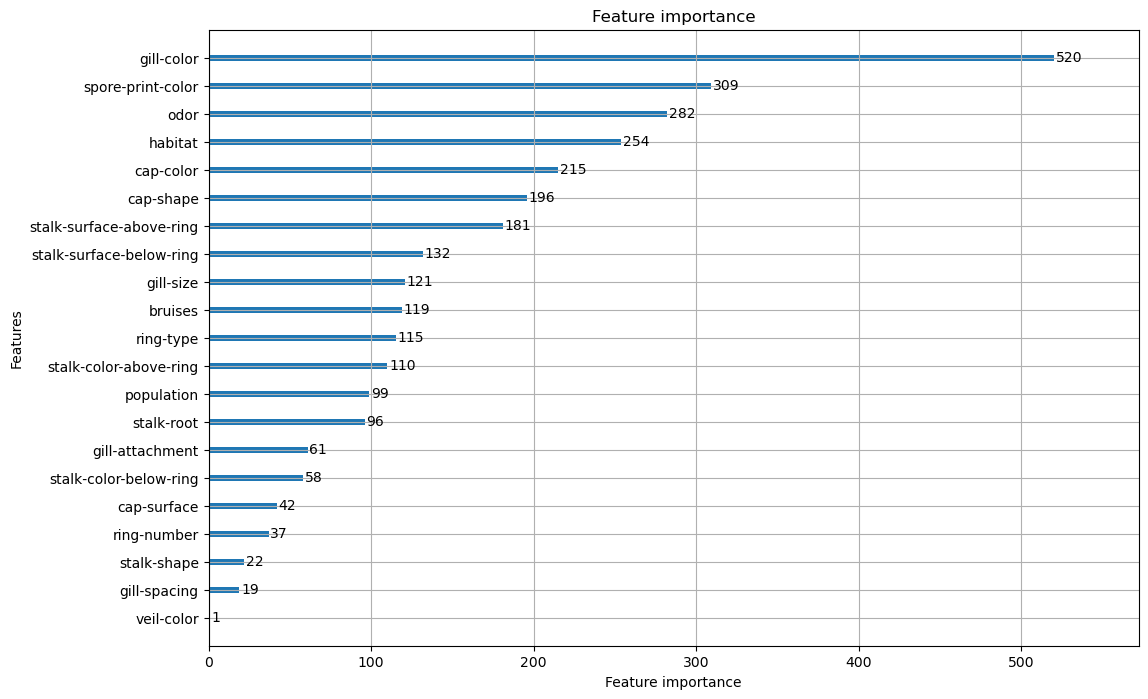

In [18]:
lgb.plot_importance(lgb_model, figsize=(12,8))


In [19]:
Test_p= Test_df.copy()
for col in Test_df.columns:
    Test_p[col] = le.fit_transform(Test_p[col])
Test_p.drop(['index'],axis=1,inplace=True)
Test_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 2000 non-null   int32
 1   cap-surface               2000 non-null   int32
 2   cap-color                 2000 non-null   int32
 3   bruises                   2000 non-null   int32
 4   odor                      2000 non-null   int32
 5   gill-attachment           2000 non-null   int32
 6   gill-spacing              2000 non-null   int32
 7   gill-size                 2000 non-null   int32
 8   gill-color                2000 non-null   int32
 9   stalk-shape               2000 non-null   int32
 10  stalk-root                2000 non-null   int32
 11  stalk-surface-above-ring  2000 non-null   int32
 12  stalk-surface-below-ring  2000 non-null   int32
 13  stalk-color-above-ring    2000 non-null   int32
 14  stalk-color-below-ring    2000 non-null 

In [21]:
y_pred = lgb_model.predict(Test_p)


In [22]:
output = pd.DataFrame({'index':Test_p.index,
                       'class':y_pred})


In [23]:
output

,index,class
0,0,p
1,1,p
2,2,p
3,3,p
4,4,e
...,...,...
1995,1995,p
1996,1996,e
1997,1997,e
1998,1998,p


In [24]:
output.to_csv('../Output_prediction/submission014.csv', index=False)
